In [22]:
import qiskit
import sys
sys.path.append('../..')
from methods import run_main_loop, execute_circuits
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer

In [3]:
qr = qiskit.QuantumRegister(5)
cr = qiskit.ClassicalRegister(5)

In [4]:
#Mapowanie
C1=3
C2=4
C3=1
T=0
A=2

In [5]:
def ccnot(control1, control2, target):
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.ccx(qr[control1], qr[control2], qr[target])
    return(circuit)

In [6]:
def rtof3(control1,control2,target):
    rtof=qiskit.QuantumCircuit(qr, cr)
    rtof.h(qr[target])
    rtof.t(qr[target])
    rtof.cx(qr[control2],qr[target])
    rtof.tdg(qr[target])
    rtof.cx(qr[control1],qr[target])
    rtof.t(qr[target])
    rtof.cx(qr[control2],qr[target])
    rtof.tdg(qr[target])
    rtof.h(qr[target])
    return rtof

In [7]:
measure_all=qiskit.QuantumCircuit(qr, cr)
measure_all.measure(qr,cr)

In [8]:
rtof4 = rtof3(C1, C2, A) + ccnot(A, C3, T) + rtof3(C1, C2, A)

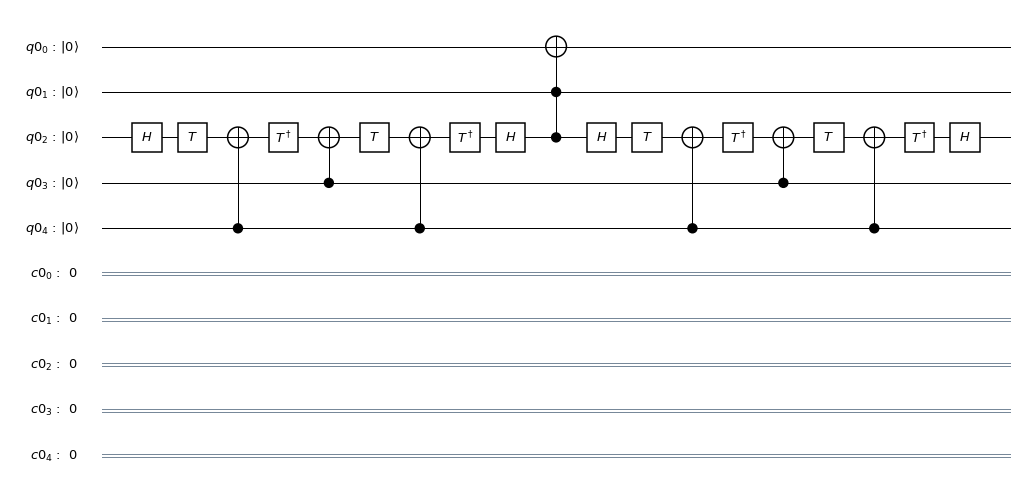

In [ ]:
drawer(rtof4)

In [10]:
def prepare_state(state):
    prepare=qiskit.QuantumCircuit(qr, cr)
    if(state[0]=='1'):
        prepare.x(qr[C1])
    if(state[1]=='1'):
        prepare.x(qr[C2])
    if(state[2]=='1'):
        prepare.x(qr[C3])
    if(state[3]=='1'):
        prepare.x(qr[T])
    return(prepare)

In [11]:
states = ['{0:04b}'.format(x) for x in range(2**4)]

In [37]:
def expected_cccnot(state):
    if(state == '1110'):
        expected = '1111'
    else:
        if(state == '1111'):
            expected = '1110'
        else:
            expected = state
    
    mapped_expected = list('xxxxx')
    mapped_expected[C1] = expected[0]
    mapped_expected[C2] = expected[1]
    mapped_expected[C3] = expected[2]
    mapped_expected[T] = expected[3]
    mapped_expected[A] = '0'
    mapped_expected = list(reversed(mapped_expected))
    mapped_expected = "".join(mapped_expected)
    return(mapped_expected)

In [34]:
"".join(list(reversed(['1','x'])))

'x1'

In [38]:
#CHECK
import warnings
warnings.filterwarnings('ignore')
for state in states:
    print('state: '+state)
    print('expected outcome: '+expected_cccnot(state))
    circuit=prepare_state(state)+rtof4+measure_all
    result = execute_circuits(circuit, 'qasm_simulator').result().get_data()
    print(result)
    result = list(result['counts'])[0]
    print('measured state: '+ result)
    print('correct? '+str(result==expected_cccnot(state)))
    print('\n')

state: 0000
expected outcome: 00000
{'counts': {'00000': 1024}}
measured state: 00000
correct? True


state: 0001
expected outcome: 00001
{'counts': {'00001': 1024}}
measured state: 00001
correct? True


state: 0010
expected outcome: 00010
{'counts': {'00010': 1024}}
measured state: 00010
correct? True


state: 0011
expected outcome: 00011
{'counts': {'00011': 1024}}
measured state: 00011
correct? True


state: 0100
expected outcome: 10000
{'counts': {'10000': 1024}}
measured state: 10000
correct? True


state: 0101
expected outcome: 10001
{'counts': {'10001': 1024}}
measured state: 10001
correct? True


state: 0110
expected outcome: 10010
{'counts': {'10010': 1024}}
measured state: 10010
correct? True


state: 0111
expected outcome: 10011
{'counts': {'10011': 1024}}
measured state: 10011
correct? True


state: 1000
expected outcome: 01000
{'counts': {'01000': 1024}}
measured state: 01000
correct? True


state: 1001
expected outcome: 01001
{'counts': {'01001': 1024}}
measured state: 01

In [39]:
circuits = []
for state in states:
    circuit=prepare_state(state)+rtof4+measure_all
    circuits.append(circuit)

In [ ]:
run_main_loop(circuits)
#started 27.11.2018 21:13

Iteration number:  0
Getting available backends...
Executing quantum program on ibmqx4.
Program sent for execution to  ibmqx4 .
Iteration number:  1
Getting available backends...
